# 1. Proje: Predicting Diabetes Using the Kaggle Patient Assay Dataset

## K-Nearest Neighbours Model

📌Daha önce elde edilen noktalara bakarak yeni nokta geldiği zaman onun hangi grupta olduğunu bulmak için kullanılır.

📌En yakındaki k tane komşu bulunur.

📌En çok hangi gruptan komşu varsa yeni gelen noktanın o grupta olduğu kabul edilir.

📌Kısaca bir classification algoritmasıdır.

📌Öklid mesafe algoritması kullanılır. (a,b)= ((a1²-b1²)+(a2²-b2²))¹/²

📌 Bu projede Kaggle veri setimizi ikiye ayıracağız bir kısmını Knn methodu uygulamak için diğerini ise test etmek için kullanacağız.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data= pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


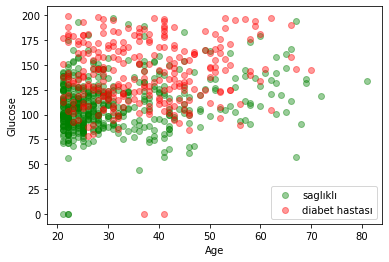

In [3]:
#Outcome=1 şeker hastası
#Outcome=0 sağlıklı 
seker_hastalari=data[data.Outcome==1]
saglikli_insanlar=data[data.Outcome==0]
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="green", label="saglıklı", alpha=0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="diabet hastası", alpha=0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()

In [4]:
#x ve y eksenlerini belirleyelim
y=data.Outcome.values #0 yada 1 olma durumu
x_ham_veri=data.drop(["Outcome"], axis=1) # O ve 1 olma ("outcome") durumu dışındaki özellikler
#Outcome sütununu (depented variable) çıkarıp sadece independent variables bırakıyoruz.
#Çünkü KNN algoritması x değerleri içerisinde guruplandırma yapacak.

#Normalization işlemi yapıyoruz x_ham_veri içerisindeki değerleri sadece 
#0 ve 1 arasında olacak şekilde hepsini güncelliyoruz.
#Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer KNN algoritmasını yanıltabilir.

x= (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

#önce
print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head())

#sonra
print("\n\n\nNormalization sonraso yapay zeka eğitim için vereceğimiz veriler:\n")
print(x.head())

Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonraso yapay zeka eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.

C:\Users\bskyl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\bskyl\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [5]:
#train datamız ile test datamızı ayırıyoruz.
#train datamız sistemin sağlıklı insan ile hasta isanı ayırt etmesini öğrenmek için kullanılacak.
#test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye
#test etmek için kullanılacak.

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.1, random_state=1)

#knn modelimizi oluşturuyoruz.
knn= KNeighborsClassifier(n_neighbors=7 ) 
knn.fit(x_train, y_train)
prediction= knn.predict(x_test)
print("K=7 için test verilerimizin doğrulama testi sonucu ", knn.score(x_test,y_test))

K=7 için test verilerimizin doğrulama testi sonucu  0.8051948051948052


In [6]:
#k kaç olmalı
#en iyi k değerini belirleyelim
sayac=1
for k in range(1,11):
    knn_yeni=KNeighborsClassifier(n_neighbors=k)
    knn_yeni.fit(x_train,y_train)
    print(sayac, " ","Doğruluk oranı: %", knn_yeni.score(x_test,y_test)*100)
    sayac+=1

1   Doğruluk oranı: % 71.42857142857143
2   Doğruluk oranı: % 71.42857142857143
3   Doğruluk oranı: % 83.11688311688312
4   Doğruluk oranı: % 80.51948051948052
5   Doğruluk oranı: % 81.81818181818183
6   Doğruluk oranı: % 83.11688311688312
7   Doğruluk oranı: % 80.51948051948052
8   Doğruluk oranı: % 80.51948051948052
9   Doğruluk oranı: % 79.22077922077922
10   Doğruluk oranı: % 79.22077922077922


In [7]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
 
# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)
 
new_prediction = knn.predict(sc.transform(np.array([[6,148,72,35,0,33.6,0.627,50]])))
new_prediction[0]

C:\Users\bskyl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\bskyl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


1